In [2]:
import pandas as pd
import numpy as np
import os

# 调试技巧：打印当前工作目录，确认代码的执行位置
print(f"Jupyter Kernel's Current Working Directory: {os.getcwd()}")

# --- 定义正确的数据路径 (从项目根目录出发) ---
# 工艺A (Source/Pretrain)
source_features_path = 'data/01_train_set/5t_opamp/source/pretrain_design_features.csv'
source_targets_path = 'data/01_train_set/5t_opamp/source/pretrain_targets.csv'

# 工艺B (Target)
target_features_path = 'data/01_train_set/5t_opamp/target/target_design_features.csv'
target_targets_path = 'data/01_train_set/5t_opamp/target/target_targets.csv'

# --- 使用Pandas加载数据 ---
df_source_features = pd.read_csv(source_features_path)
df_source_targets = pd.read_csv(source_targets_path)
df_target_features = pd.read_csv(target_features_path)
df_target_targets = pd.read_csv(target_targets_path)

# --- 合并特征和目标，方便分析 ---
df_source = pd.concat([df_source_features, df_source_targets], axis=1)
df_target = pd.concat([df_target_features, df_target_targets], axis=1)

print("\n--- 工艺A (Source) 数据概览 ---")
print(f"数据形状: {df_source.shape}")
print("前5行数据:")
print(df_source.head())
print("\n数据信息 (类型、非空值):")
df_source.info()

print("\n\n--- 工艺B (Target) 数据概览 ---")
print(f"数据形状: {df_target.shape}")
print("前5行数据:")
print(df_target.head())
print("\n数据信息 (类型、非空值):")
df_target.info()


Jupyter Kernel's Current Working Directory: /home/mario1578347613/eda-for-transfer-learning-1

--- 工艺A (Source) 数据概览 ---
数据形状: (10000, 12)
前5行数据:
     w1    w2    w3   l1   l2   l3     ibias  slewrate_pos    dc_gain  \
0  36.0  45.5  48.0  1.5  1.0  1.0  0.000010  4.632388e+06  43.156192   
1   8.0   1.5   9.5  0.5  1.0  1.5  0.000010  4.275136e+06  52.605774   
2  48.0  11.0  29.0  1.0  1.5  2.0  0.000020  8.386308e+06  65.472125   
3  10.5  39.5  41.0  2.0  1.5  1.0  0.000015  5.813552e+06  57.722778   
4   6.0  37.0  47.0  1.0  1.0  0.5  0.000005  2.501685e+06  35.824210   

            ugf  phase_margin         cmrr  
0  8.704748e+06     84.216275  3088.825140  
1  7.969067e+06     89.911187  1942.853178  
2  1.703837e+07     82.835579  1935.063614  
3  8.907475e+06     84.134990  2986.940363  
4  3.917814e+06     88.272305  6472.095254  

数据信息 (类型、非空值):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        No

In [3]:
print("--- 工艺A (Source) 统计描述 ---")
print(df_source.describe())

print("\n\n--- 工艺B (Target) 统计描述 ---")
print(df_target.describe())


--- 工艺A (Source) 统计描述 ---
                 w1            w2            w3           l1            l2  \
count  10000.000000  10000.000000  10000.000000  10000.00000  10000.000000   
mean      25.250100     25.250100     25.249800      1.24995      1.250000   
std       14.291462     14.291553     14.291245      0.47872      0.478772   
min        0.500000      0.500000      0.500000      0.50000      0.500000   
25%       13.000000     13.000000     13.000000      1.00000      1.000000   
50%       25.250000     25.250000     25.250000      1.25000      1.250000   
75%       37.500000     37.500000     37.500000      1.50000      1.500000   
max       50.000000     50.000000     50.000000      2.00000      2.000000   

                l3         ibias  slewrate_pos       dc_gain           ugf  \
count  10000.00000  10000.000000  1.000000e+04  10000.000000  1.000000e+04   
mean       1.25005      0.000013  5.294579e+06     49.905259  6.944503e+07   
std        0.47872      0.000005  1.9

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set_style("whitegrid")


In [5]:
feature_columns = ['w1', 'w2', 'w3', 'l1', 'l2', 'l3', 'ibias']
target_columns = ['slewrate_pos', 'dc_gain', 'ugf', 'phase_margin', 'cmrr']


--- 输入特征 (Design Parameters) 分布对比 ---


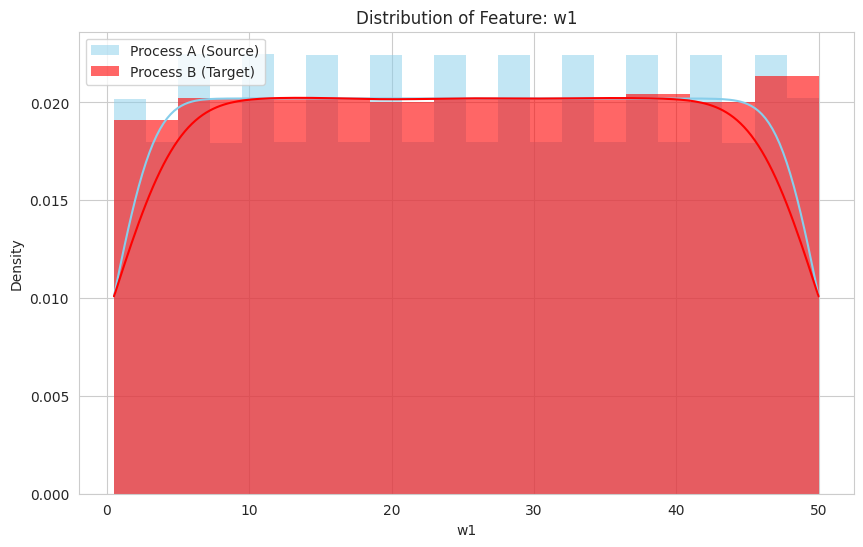

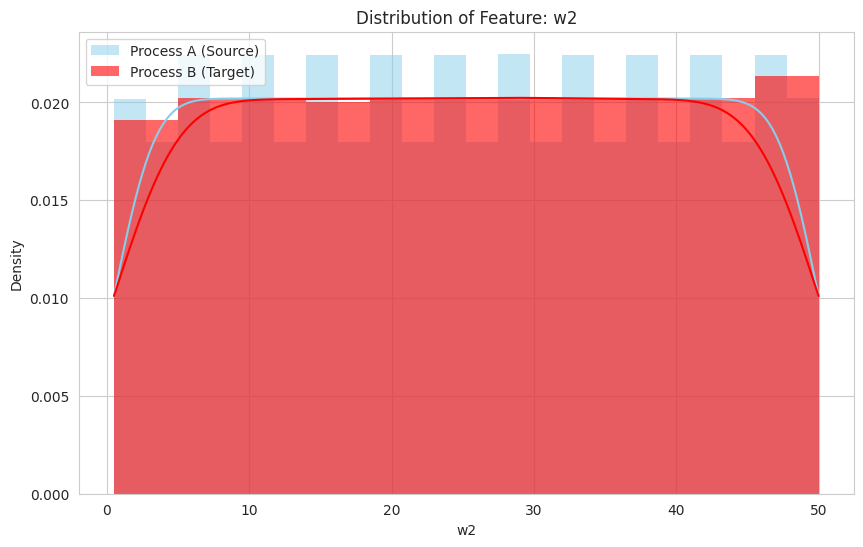

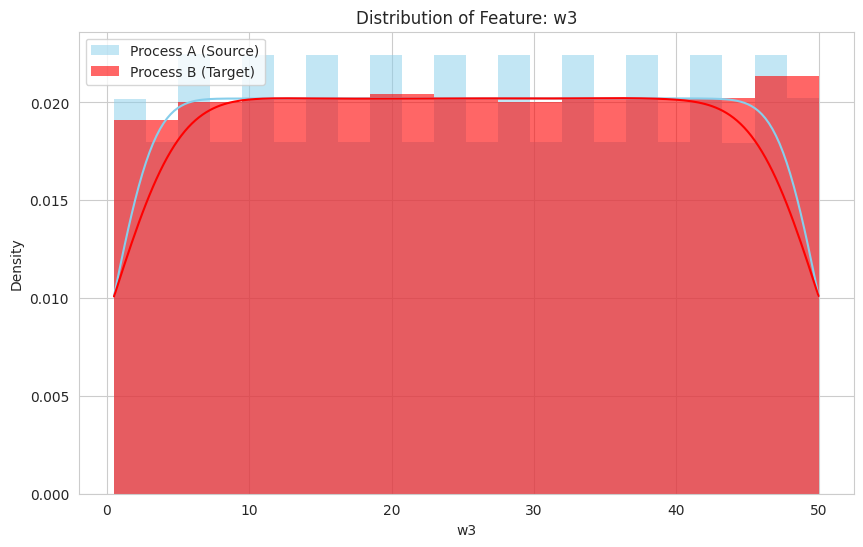

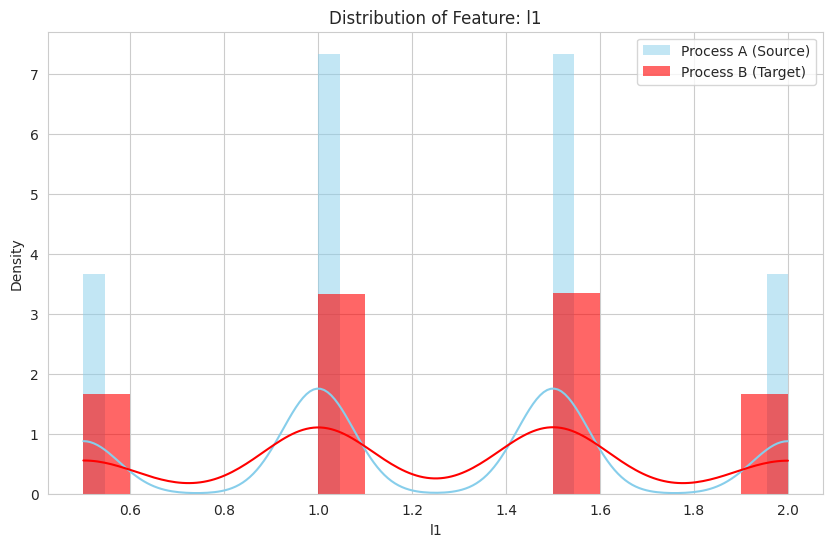

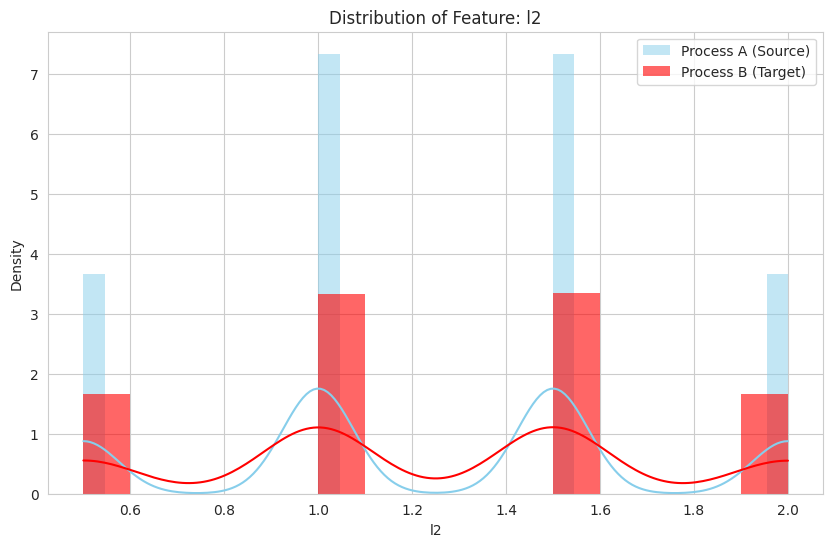

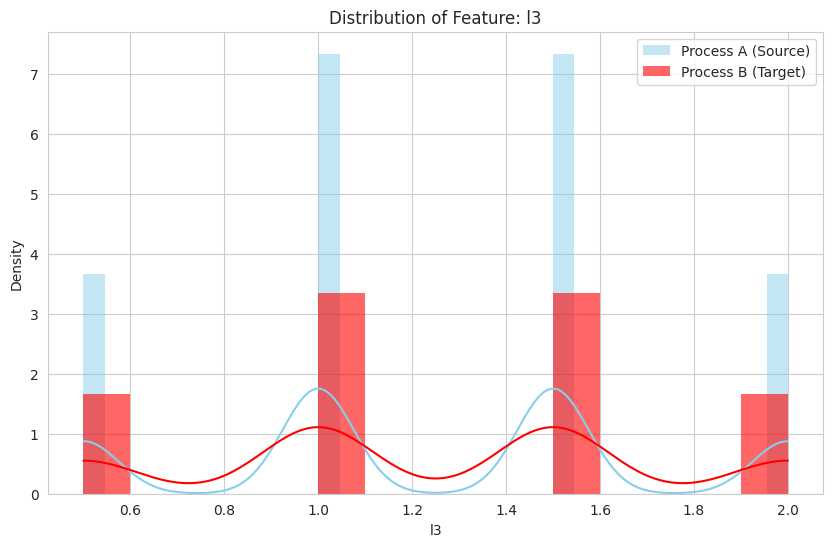

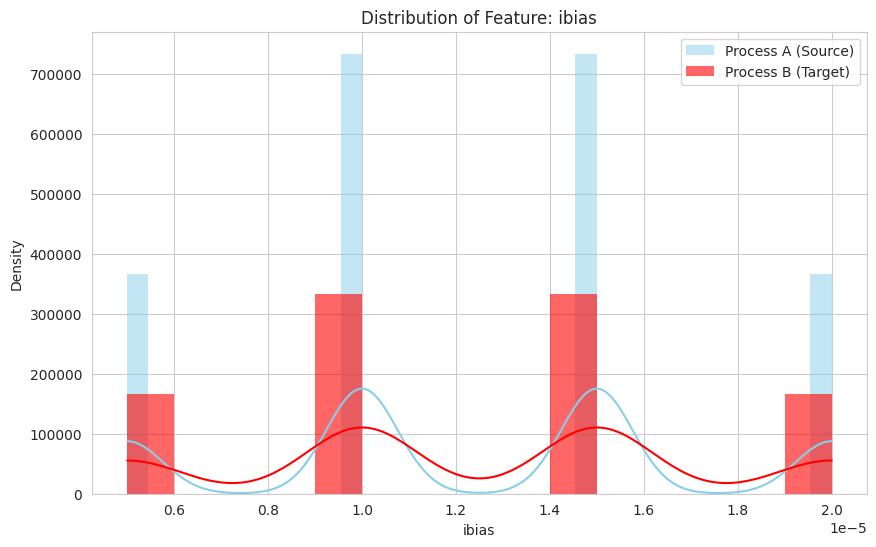

In [6]:
print("--- 输入特征 (Design Parameters) 分布对比 ---")
for col in feature_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_source[col], color="skyblue", label='Process A (Source)', kde=True, stat="density", linewidth=0)
    sns.histplot(df_target[col], color="red", label='Process B (Target)', kde=True, stat="density", linewidth=0, alpha=0.6)
    plt.title(f'Distribution of Feature: {col}')
    plt.legend()
    plt.show()



--- 输出性能 (Performance Metrics) 分布对比 ---


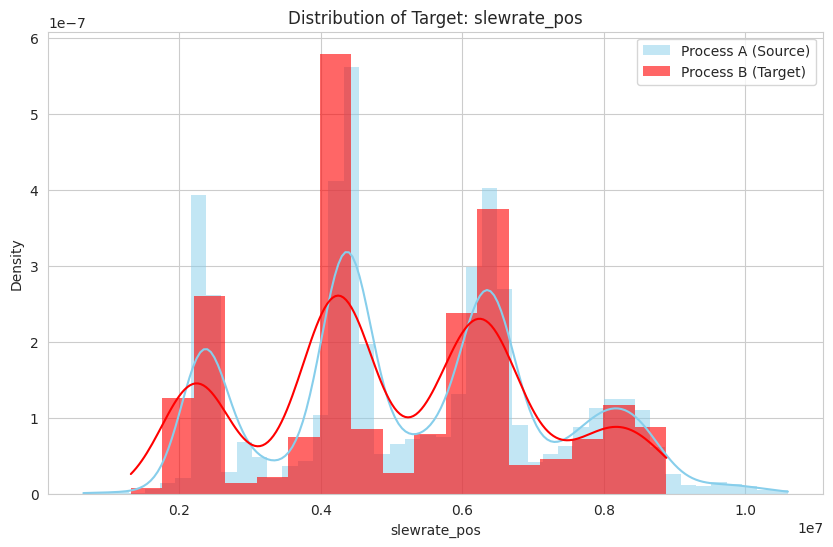

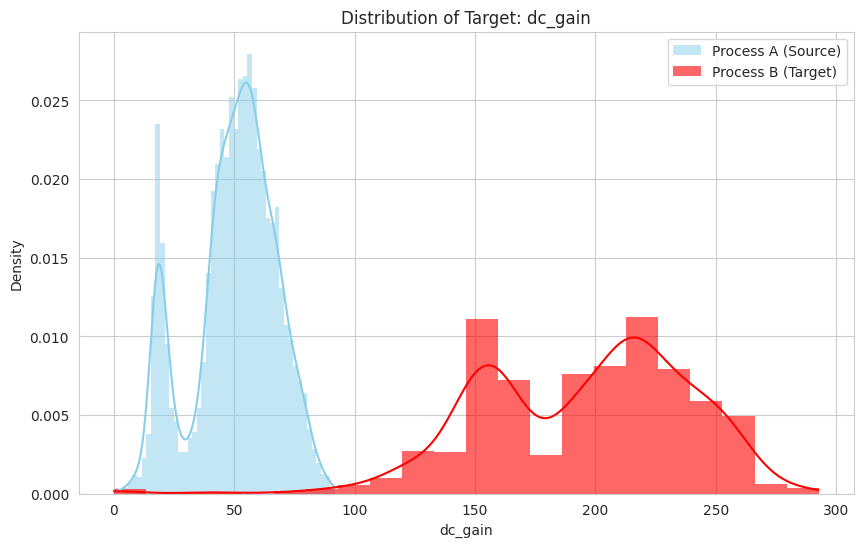

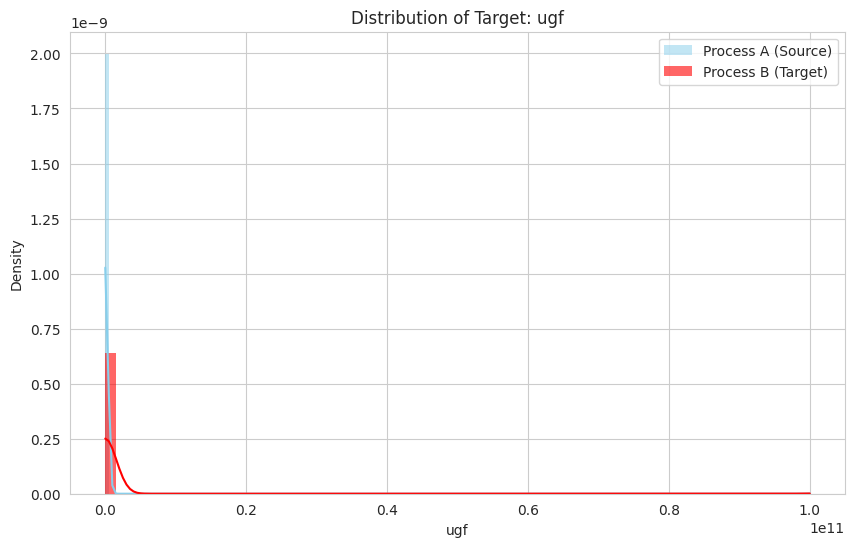

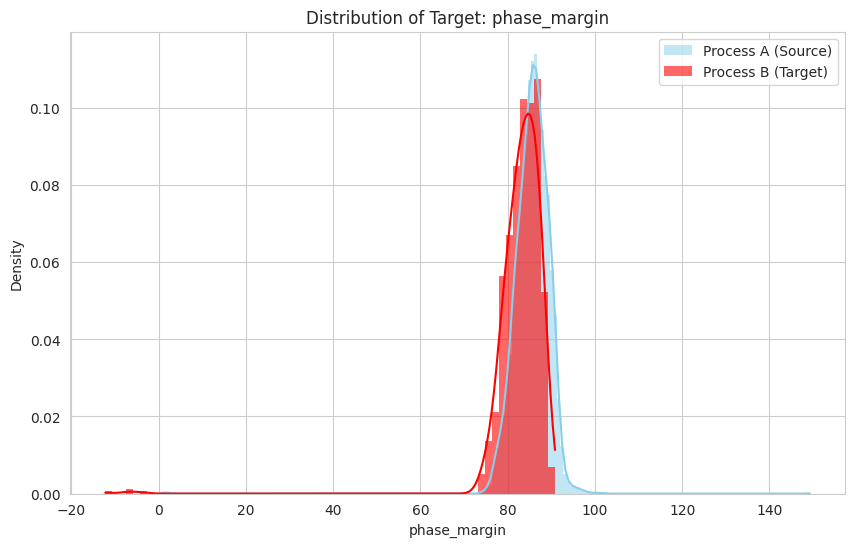

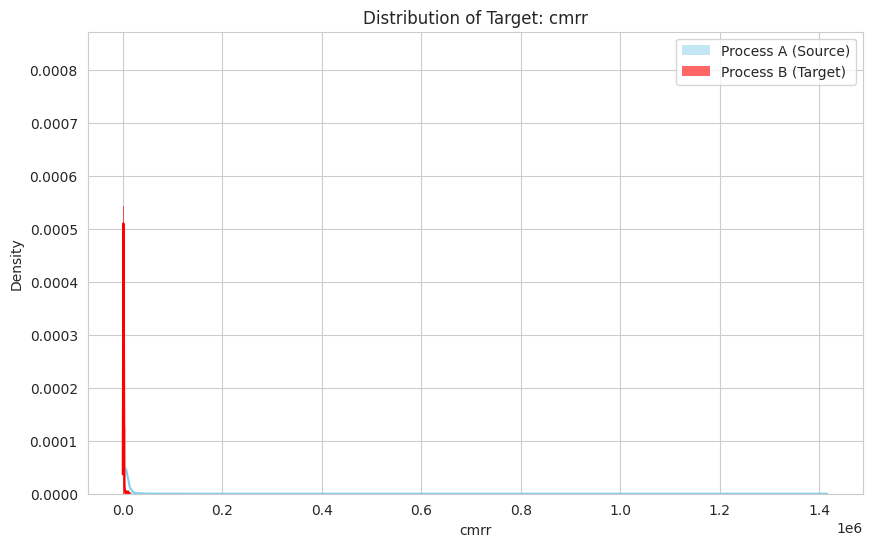

In [7]:
print("\n--- 输出性能 (Performance Metrics) 分布对比 ---")
for col in target_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_source[col], color="skyblue", label='Process A (Source)', kde=True, stat="density", linewidth=0)
    sns.histplot(df_target[col], color="red", label='Process B (Target)', kde=True, stat="density", linewidth=0, alpha=0.6)
    plt.title(f'Distribution of Target: {col}')
    plt.legend()
    plt.show()
